In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings. filterwarnings('ignore')
%matplotlib inline

# loading data

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
df = pd.DataFrame( iris.data , columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Visualization

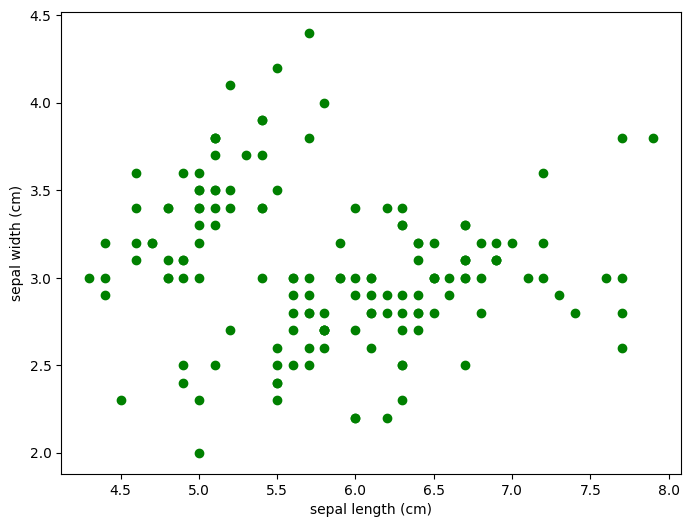

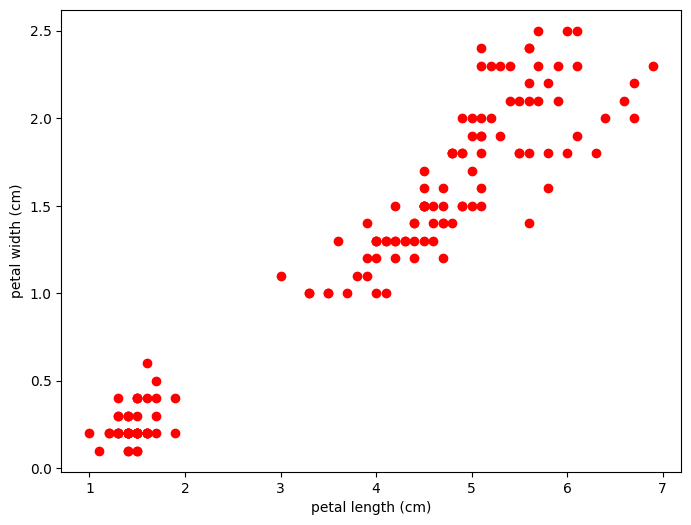

In [11]:
# Create a count plot 
def scatterPlot(df ,  x , y ,col ,  mark ):
    plt.figure(figsize=(8, 6))

    plt.scatter(df[x] , df[y] , color = col , marker = mark)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatterPlot( df , "sepal length (cm)"  ,'sepal width (cm)' , 'green' , 'o')
scatterPlot( df , "petal length (cm)"  ,'petal width (cm)' , 'red' , 'o')



# Preprocessing using min max scaler

In [25]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df) , columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


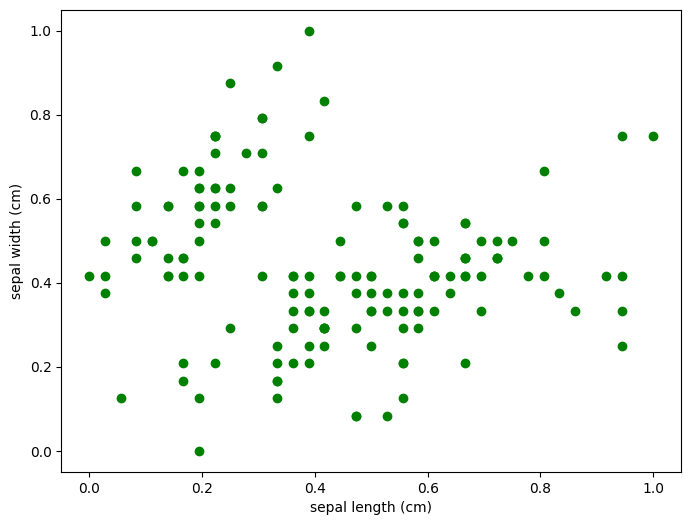

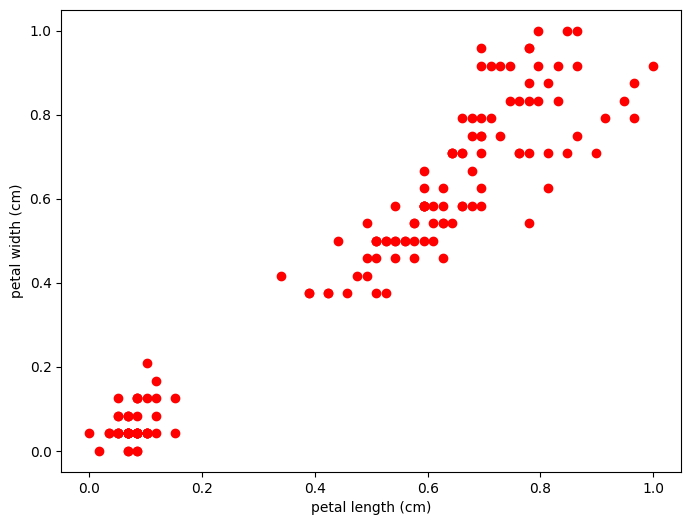

In [26]:
scatterPlot( df , "sepal length (cm)"  ,'sepal width (cm)' , 'green' , 'o')
scatterPlot( df , "petal length (cm)"  ,'petal width (cm)' , 'red' , 'o')



# Find Optimal K - Elbow Method

Text(0, 0.5, 'Sum of squared error')

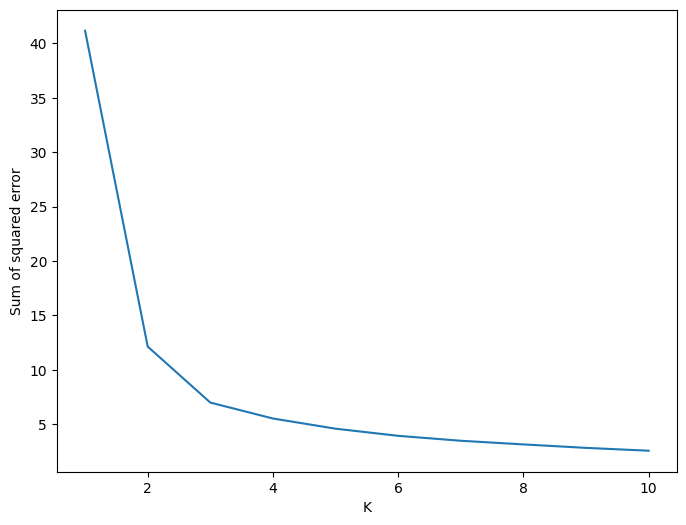

In [27]:
mse  = []

for k in range(1 , 11):
    kmean = KMeans(n_clusters=k)
    kmean.fit(df)
    mse.append(kmean.inertia_)

plt.figure(figsize=(8, 6))
plt.plot( range(1 , 11) , mse )
plt.xlabel('K')
plt.ylabel('Sum of squared error')
    

 optimal values is k = 3

# create k-mean model

In [21]:
from sklearn.cluster import  KMeans

In [28]:
kmean = KMeans(n_clusters=3)
kmean.fit(df)
y_pred = kmean.predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
df['cluster'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [30]:
kmean.cluster_centers_


array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [31]:
kmean.inertia_

6.982216473785236

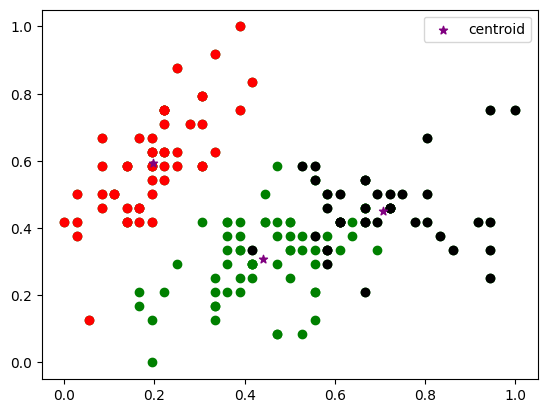

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df["sepal length (cm)"]  ,df['sepal width (cm)'],color='green')
plt.scatter(df2["sepal length (cm)"]  ,df2['sepal width (cm)'],color='red')
plt.scatter(df3["sepal length (cm)"]  ,df3['sepal width (cm)'],color='black')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

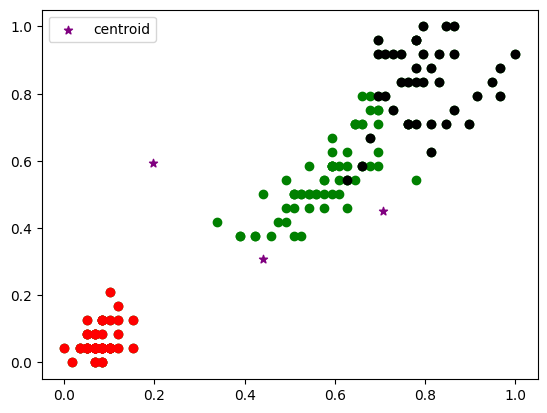

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df["petal length (cm)"]  ,df['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"]  ,df2['petal width (cm)'],color='red')
plt.scatter(df3["petal length (cm)"]  ,df3['petal width (cm)'],color='black')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
